<a href="https://colab.research.google.com/github/AlisaDinkel/cs102/blob/homework08/homework08/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_8_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.*

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [58]:
import pandas as pd
import numpy as np
from google.colab import drive
import random


"""Загружаем датасет - шаг 1.1"""
# Монтируем Google Drive
drive.mount('/content/drive')

# Загружаем датасет
dataset = pd.read_csv('/content/drive/MyDrive/music_genre.csv')


"""Выбираем случайные 20 тыс. строк из датасета - шаг 1.2"""
random_sample = dataset.iloc[random.sample(list(range(dataset.shape[0])), 20_000)]
# Заново пронумеруем индексы
random_sample = random_sample.reset_index(drop=True)

random_sample.head(5)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,81727.0,Speedometer,No Turning Back (feat. James Junior),43.0,0.2830,0.726,254773.0,0.7040,0.00257,D,0.0767,-8.356,Minor,0.0370,113.50399999999999,4-Apr,0.9040,Jazz
1,66606.0,Three Days Grace,Riot,66.0,0.0104,0.185,207587.0,0.9480,0.00000,G#,0.1050,-3.892,Major,0.1470,196.578,3-Apr,0.3160,Alternative
2,45002.0,Gustav Mahler,Symphony No.5 In C Sharp Minor: 1. Trauermarsc...,34.0,0.9440,0.165,774000.0,0.0934,0.89100,C#,0.0700,-20.455,Minor,0.0392,96.083,3-Apr,0.0685,Classical
3,20340.0,Noname,All I Need (feat. Xavier Omär),54.0,0.7720,0.645,240462.0,0.3640,0.00000,F#,0.1140,-9.699,Minor,0.4290,91.564,4-Apr,0.5000,Rap
4,63767.0,RIMON,Grace,50.0,0.2110,0.745,205714.0,0.5210,0.00000,F,0.1050,-9.244,Minor,0.1410,98.036,4-Apr,0.6680,Alternative


In [59]:
"""Удаляем дублирующиеся строки - шаг 1.3"""
old_shape = random_sample.shape[0]
cleaned_dataset = random_sample.drop_duplicates()

# Проверим наличие дубликатов по количеству строк новой и старой таблицы
print('Дубликатов не обнаружено' if old_shape == cleaned_dataset.shape[0] else 'Дубликаты удалены')


"""Проверяем наличие строк, где значение в столбце artist_name равно 'empty_field' - шаг 1.4.1"""
empty_field_rows = cleaned_dataset[cleaned_dataset['artist_name'] == 'empty_field']
print("Количество строк с empty_field: ", len(empty_field_rows))

empty_field_rows.head(5)


Дубликаты удалены
Количество строк с empty_field:  1004


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
39,44304.0,empty_field,A-Team,65.0,0.048500,0.626,176640.0,0.526,0.006270,G,0.107,-4.112,Minor,0.0452,127.977,4-Apr,0.170,Rap
51,45196.0,empty_field,Hate My Life,60.0,0.016200,0.508,190547.0,0.828,0.000000,C#,0.266,-4.065,Major,0.0330,125.868,4-Apr,0.449,Rock
103,86435.0,empty_field,Renegade,67.0,0.436000,0.646,336133.0,0.718,0.000002,C#,0.173,-4.898,Minor,0.4120,82.535,4-Apr,0.822,Rap
114,61619.0,empty_field,Gravehop187,53.0,0.081400,0.447,176173.0,0.949,0.000000,G,0.406,-5.043,Major,0.2090,153.995,4-Apr,0.240,Hip-Hop
126,49398.0,empty_field,Disposable Teens,50.0,0.000044,0.521,181507.0,0.956,0.013800,A#,0.530,-5.019,Major,0.1440,100.49600000000001,3-Apr,0.300,Alternative


In [60]:
"""Удаляем строки, где значение в столбце artist_name равно 'empty_field' - шаг 1.4.2"""
# cleaned_dataset = cleaned_dataset[cleaned_dataset.artist_name != "empty_field"]
cleaned_dataset = cleaned_dataset.drop(empty_field_rows.index)
print("Количество строк без empty_field: ", len(cleaned_dataset))
# Восстановим индексы
cleaned_dataset = cleaned_dataset.reset_index(drop=True)
cleaned_dataset.head(5)

Количество строк без empty_field:  18994


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,81727.0,Speedometer,No Turning Back (feat. James Junior),43.0,0.2830,0.726,254773.0,0.7040,0.00257,D,0.0767,-8.356,Minor,0.0370,113.50399999999999,4-Apr,0.9040,Jazz
1,66606.0,Three Days Grace,Riot,66.0,0.0104,0.185,207587.0,0.9480,0.00000,G#,0.1050,-3.892,Major,0.1470,196.578,3-Apr,0.3160,Alternative
2,45002.0,Gustav Mahler,Symphony No.5 In C Sharp Minor: 1. Trauermarsc...,34.0,0.9440,0.165,774000.0,0.0934,0.89100,C#,0.0700,-20.455,Minor,0.0392,96.083,3-Apr,0.0685,Classical
3,20340.0,Noname,All I Need (feat. Xavier Omär),54.0,0.7720,0.645,240462.0,0.3640,0.00000,F#,0.1140,-9.699,Minor,0.4290,91.564,4-Apr,0.5000,Rap
4,63767.0,RIMON,Grace,50.0,0.2110,0.745,205714.0,0.5210,0.00000,F,0.1050,-9.244,Minor,0.1410,98.036,4-Apr,0.6680,Alternative


In [86]:
print(f'Вывод: до удаления строк с empty_field было {random_sample.shape[0]} строк, после удаления стало {cleaned_dataset.shape[0]} строк')
print("Информация о выборке:")
print(cleaned_dataset.info())


Вывод: до удаления строк с empty_field было 20000 строк, после удаления стало 18994 строк
Информация о выборке:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18994 entries, 0 to 18993
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       18993 non-null  float64
 1   artist_name       18993 non-null  object 
 2   track_name        18993 non-null  object 
 3   popularity        18993 non-null  float64
 4   acousticness      18993 non-null  float64
 5   danceability      18993 non-null  float64
 6   duration_ms       18993 non-null  float64
 7   energy            18993 non-null  float64
 8   instrumentalness  18993 non-null  float64
 9   key               18993 non-null  object 
 10  liveness          18993 non-null  float64
 11  loudness          18993 non-null  float64
 12  mode              18993 non-null  object 
 13  speechiness       18993 non-null  float64
 14  tempo             1899

### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


"""Вычисляем долю каждого жанра - шаг 2.1"""
genre_percentage = pd.DataFrame(cleaned_dataset["music_genre"].value_counts(normalize=True) * 100).rename(columns={'music_genre' : 'genre_percentage'})

genre_percentage


,genre_percentage
Jazz,10.309061
Electronic,10.103722
Rock,10.061602
Blues,10.056337
Hip-Hop,10.056337
Classical,10.014216
Rap,9.977360
Country,9.866793
Alternative,9.856263
Anime,9.698310


Text(0.5, 1.0, 'Distribution of Track Count by Genre')

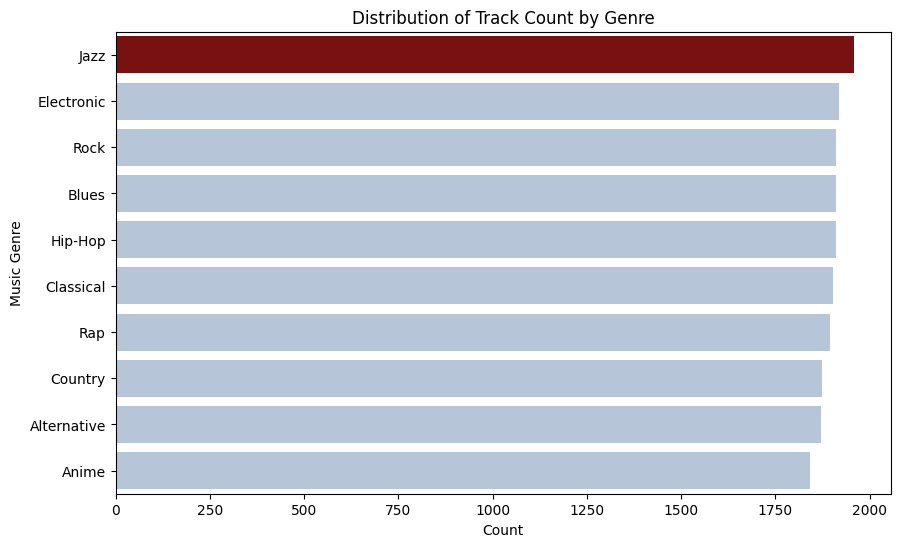

In [63]:
"""Строим столбиковую диаграмму - шаг 2.2"""
genre_counts = cleaned_dataset["music_genre"].value_counts()
genres = genre_counts.index
values = genre_counts.values

genre_data = pd.DataFrame({"Music Genre": genres, "Count": values})
colors = ["lightsteelblue" if (count < max(values)) else "darkred" for count in values]

plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Music Genre", data=genre_data, palette=colors)
plt.xlabel("Count")
plt.ylabel("Music Genre")
plt.title("Distribution of Track Count by Genre")


In [64]:
"""Находим самый танцевальный жанр - шаг 2.3"""
danceability_by_genre = pd.DataFrame(cleaned_dataset.groupby("music_genre")["danceability"].mean())
most_danceable_genre = danceability_by_genre.idxmax()
most_danceable_genre_value = danceability_by_genre.max()

print(f'Самый танцевальный жанр: {most_danceable_genre[0]} со средним значением показателя danceability: {most_danceable_genre_value[0]}')
danceability_by_genre




Самый танцевальный жанр: Hip-Hop со средним значением показателя danceability: 0.7197256544502617


,danceability
music_genre,
Alternative,0.539035
Anime,0.465018
Blues,0.531920
Classical,0.306231
Country,0.577303
Electronic,0.616799
Hip-Hop,0.719726
Jazz,0.585381
Rap,0.698857


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(danceability_by_genre, *['danceability'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(danceability_by_genre, *['danceability'], **{})
chart

In [65]:
"""Определяем преобладающую тональность в каждом жанре - шаг 2.4"""
mode_by_genre = pd.DataFrame(cleaned_dataset.groupby(["music_genre", "mode"]).size().unstack())
mode_by_genre["Predominant"] = np.where(mode_by_genre["Minor"] > mode_by_genre["Major"], "Minor", "Major")

mode_by_genre




mode,Major,Minor,Predominant
music_genre,,,
Alternative,1197,675,Major
Anime,1118,724,Major
Blues,1394,516,Major
Classical,1236,666,Major
Country,1628,246,Major
Electronic,1011,908,Major
Hip-Hop,1069,841,Major
Jazz,1014,944,Major
Rap,1036,859,Major


In [87]:
print(f'Вывод:\nСамый танцевальный жанр: {most_danceable_genre[0]}\nВ большинстве жанров преобрадает тональность: Major')
print("Доля каждого жанра:")
print(genre_percentage)


Вывод:
Самый танцевальный жанр: Hip-Hop
В большинстве жанров преобрадает тональность: Major
Доля каждого жанра:
             genre_percentage
Jazz                10.309061
Electronic          10.103722
Rock                10.061602
Blues               10.056337
Hip-Hop             10.056337
Classical           10.014216
Rap                  9.977360
Country              9.866793
Alternative          9.856263
Anime                9.698310


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [139]:
"""Находим исполнителя с наибольшим и наименьшим количеством треков - шаг 3.1"""
max_min_artist = (
    pd.DataFrame(cleaned_dataset.groupby(["artist_name"]).size().sort_values()).reset_index().rename(columns={0: "Value"})
)
max_min_artist.iloc[[0, -1]]

,artist_name,Value
0,John 5,1
4839,Wolfgang Amadeus Mozart,166


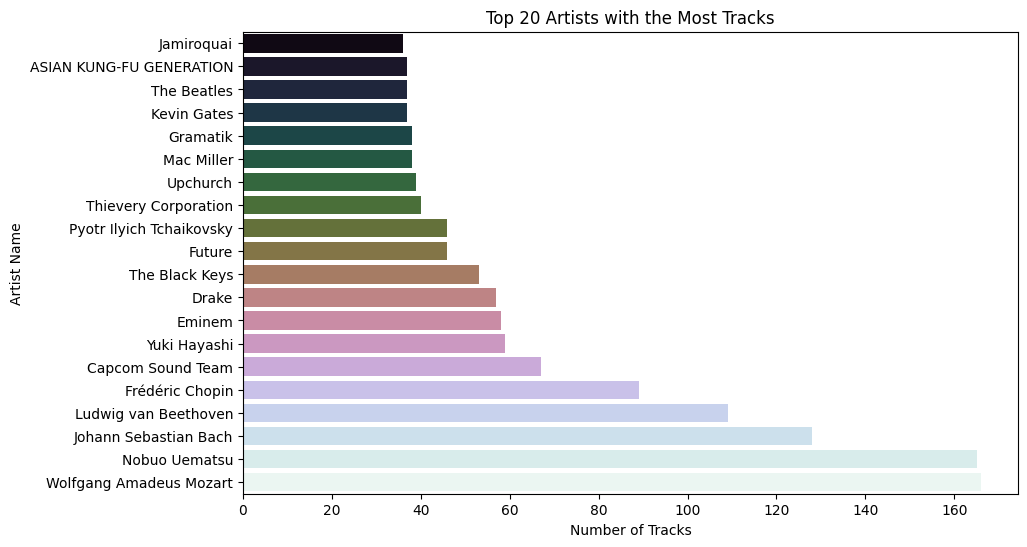

In [73]:
"""Строим горизонтальную столбиковую диаграмму топ-20 исполнителей - шаг 3.2"""
artist_counts = cleaned_dataset["artist_name"].value_counts()

top_20_artists = artist_counts.nlargest(20)
top_20_artists = top_20_artists[::-1]  # Обратный шаг для горизонтальной диаграммы

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_artists.values, y=top_20_artists.index, palette="cubehelix")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist Name")
plt.title("Top 20 Artists with the Most Tracks")
plt.show()


In [74]:
max_artist = max_min_artist.iloc[-1]["artist_name"]
min_artist = max_min_artist.iloc[0]["artist_name"]
print(f"Вывод:\nБольше всего треков у исполнителя: {max_artist}\nМеньше всего треков у исполнителя: {min_artist}")

Вывод:
Больше всего треков у исполнителя: Wolfgang Amadeus Mozart
Меньше всего треков у исполнителя: John 5


### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

<ipython-input-75-2170ddccbb72>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = features.corr()


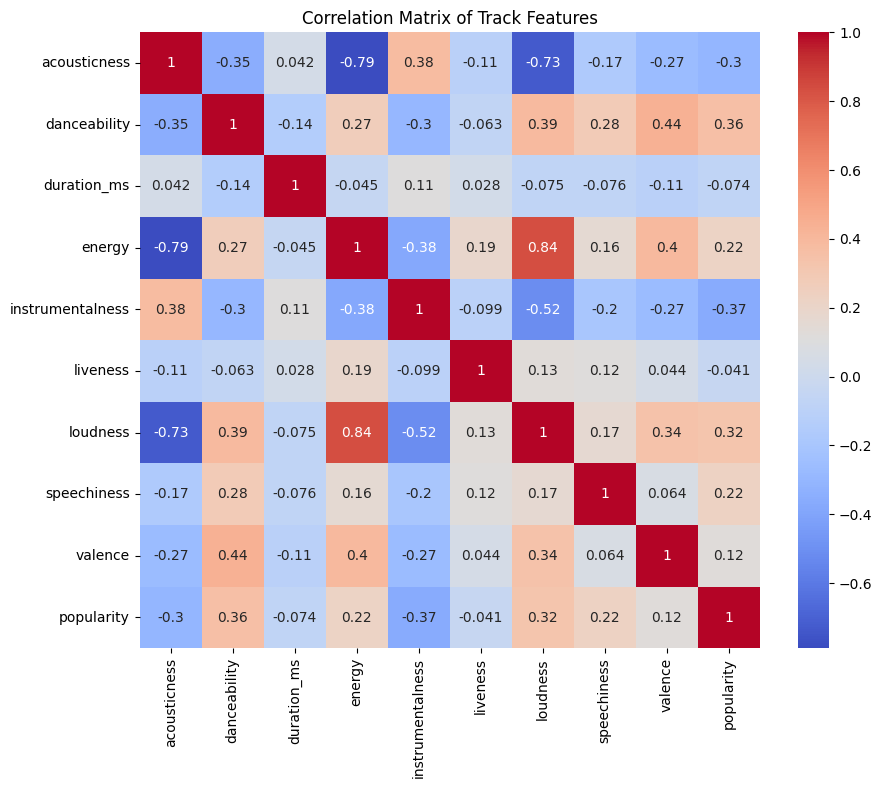

In [75]:
"""Строим корреляционную матрицу - шаг 4.1"""
features = cleaned_dataset[["acousticness", "danceability", "duration_ms", "energy", "instrumentalness",
                            "liveness", "loudness", "speechiness", "tempo", "valence", "popularity"]]

correlation_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix of Track Features")
plt.show()


Корреляция между популярностью и длиной названия трека: -0.23770164262715973


Text(0.5, 1.0, 'Correlation Matrix of Popularity and Trackname Length')

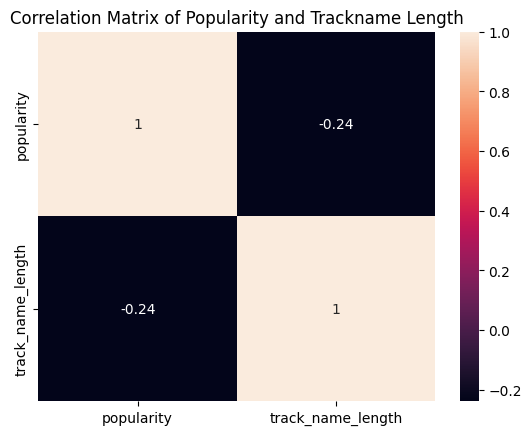

In [85]:
"""Считаем корреляцию между популярностью и длиной названия трека - шаг 4.2"""
popularity_name_length = cleaned_dataset[["popularity", "track_name"]].copy()
popularity_name_length["track_name_length"] = popularity_name_length["track_name"].str.len()

popularity_name_corr = popularity_name_length[["popularity", "track_name_length"]].corr()

print(f'Корреляция между популярностью и длиной названия трека: {popularity_name_corr.iloc[0, 1]}')

sns.heatmap(popularity_name_corr, annot=True)
plt.title("Correlation Matrix of Popularity and Trackname Length")


In [89]:
print('Вывод:')
print("Корреляция между популярностью и длиной названия трека:", popularity_name_corr.iloc[0, 1])


Вывод:
Корреляция между популярностью и длиной названия трека: -0.23770164262715973


Высокая положительная корреляция между громкостью и энергичностью

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

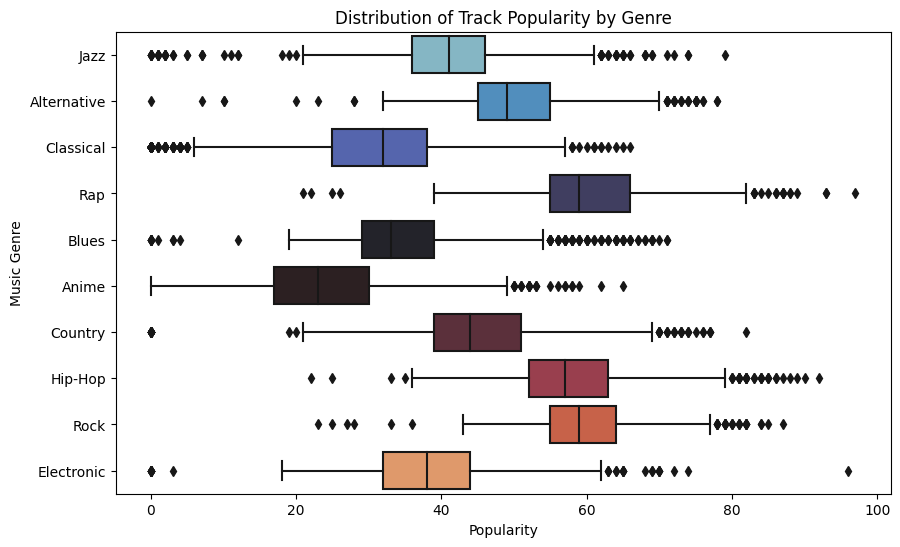

In [97]:
"""Строим ящиковую диаграмму отношения популярности треков к жанру - шаг 5"""
popularity_genre = cleaned_dataset[["music_genre", "popularity"]]

plt.figure(figsize=(10, 6))
sns.boxplot(x=popularity_genre["popularity"], y=popularity_genre["music_genre"], palette="icefire")
plt.xlabel("Popularity")
plt.ylabel("Music Genre")
plt.title("Distribution of Track Popularity by Genre")
plt.show()


Линия посередине - медиана популярности (центр распределения)
она ниже среднего - большая часть данных сконцентрирована в нижнем диапазоне наблюдений, много "высоких" выбросов
1 (превосходит 25% значений) и 3 (превосходит 75% значений) квартиль
мин и макс наблюдаемые значения - концы усов
чем короче ящик - тем меньше различается между собой популярность треков жанра
усы - минимальное и максимальное значение
выбросы - значение больше 1 и 3 кварт в 1.5 раза (несколько треков супер популярные или наоборот)

одинаковые усы - симметричные данные


Вывод:
у большинства жанров классики, электро и джаза есть какое-то количество экстремальных значений (выбросов), то есть в данном случае очень популярных треков
У жанров блюз, аниме и электро несимметричные данные (усы разной длины)

In [96]:
print("Отношение популярности треков к жанру:")
print(popularity_genre)


Отношение популярности треков к жанру:
       music_genre  popularity
0             Jazz        43.0
1      Alternative        66.0
2        Classical        34.0
3              Rap        54.0
4      Alternative        50.0
...            ...         ...
18989         Rock        71.0
18990          Rap        49.0
18991  Alternative        57.0
18992        Anime        24.0
18993  Alternative        50.0

[18994 rows x 2 columns]


### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

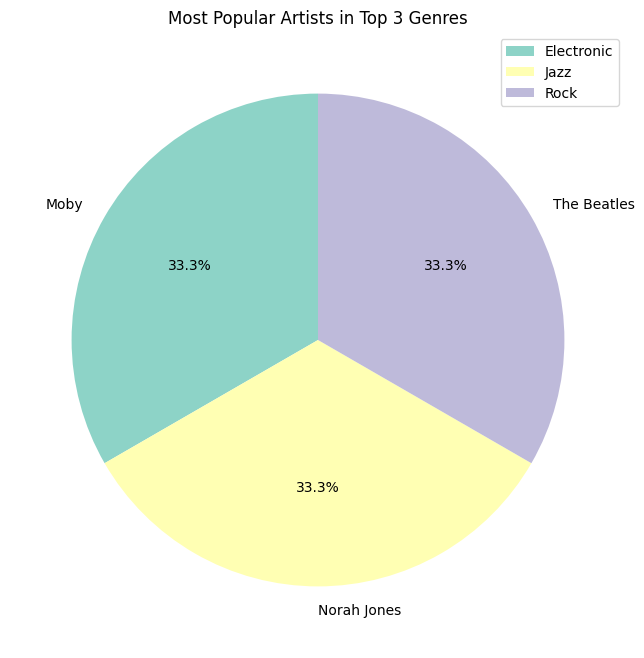

In [104]:
top_genres = cleaned_dataset["music_genre"].value_counts().nlargest(3).index.tolist()

filtered_artists = cleaned_dataset[cleaned_dataset["music_genre"].isin(top_genres)]
popular_artists = filtered_artists.groupby(["music_genre", "artist_name"]).size().groupby(level=0).idxmax()

genre_artist_df = pd.DataFrame(popular_artists.values.tolist(), columns=["music_genre", "artist_name"])
genre_artist_df["count"] = genre_artist_df.groupby("music_genre").transform("size")

plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set3")
plt.pie(genre_artist_df["count"], labels=genre_artist_df["artist_name"],
        autopct="%1.1f%%", colors=colors, startangle=90)

plt.gca().set_aspect("equal")
plt.legend(genre_artist_df["music_genre"].unique(), loc="upper right")
plt.title("Most Popular Artists in Top 3 Genres")
plt.show()


In [113]:
print('Вывод:\n')
print("Самые популярные исполнители в топ-3 жанрах:\n")
print(genre_artist_df)


Вывод:

Самые популярные исполнители в топ-3 жанрах:

  music_genre  artist_name  count
0  Electronic         Moby      1
1        Jazz  Norah Jones      1
2        Rock  The Beatles      1


### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

<ipython-input-127-dcbb86bacf08>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  .mean()
<ipython-input-127-dcbb86bacf08>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  .mean()


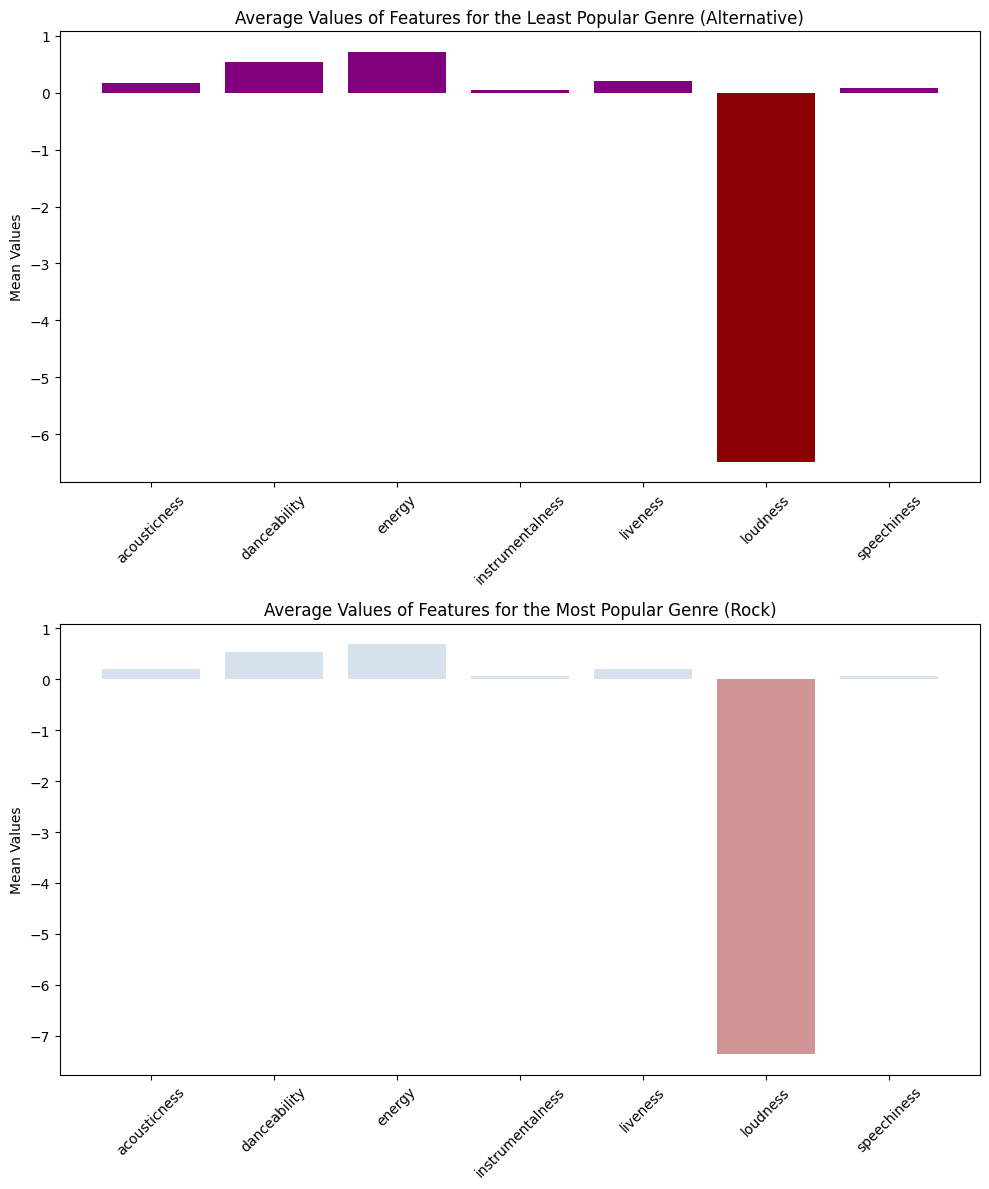

In [127]:
minimum_popularity_genre = genre_data.min().tolist()[0]
maximum_popularity_genre = genre_data.max().tolist()[0]
maximum_popularity_genre_values = (
    cleaned_dataset.loc[cleaned_dataset.music_genre == maximum_popularity_genre]
    .loc[:, "popularity":"tempo"]
    .drop(columns=["key", "mode", "popularity", "duration_ms"])
    .mean()
    .reset_index()
    .rename(columns={"index": "Feature", 0: "Value"})
)
minimum_popularity_genre_values = (
    cleaned_dataset.loc[cleaned_dataset.music_genre == minimum_popularity_genre]
    .loc[:, "popularity":"tempo"]
    .drop(columns=["key", "mode", "popularity", "duration_ms"])
    .mean()
    .reset_index()
    .rename(columns={"index": "Feature", 0: "Value"})
)
max_min_popularity_genre_feature = pd.DataFrame(maximum_popularity_genre_values["Feature"])
max_min_popularity_genre_feature["Max"], max_min_popularity_genre_feature["Min"] = (
    maximum_popularity_genre_values["Value"],
    minimum_popularity_genre_values["Value"],
)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

colors_min = ["darkred" if val < 0 else "purple" for val in max_min_popularity_genre_feature["Min"]]
colors_max = ["brown" if val < 0 else "lightsteelblue" for val in max_min_popularity_genre_feature["Max"]]

axs[0].bar(max_min_popularity_genre_feature["Feature"], max_min_popularity_genre_feature["Min"], color=colors_min)
axs[0].set_ylabel("Mean Values")
axs[0].set_title(f"Average Values of Features for the Least Popular Genre ({minimum_popularity_genre})")
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(max_min_popularity_genre_feature["Feature"], max_min_popularity_genre_feature["Max"], color=colors_max, alpha=0.5)
axs[1].set_ylabel("Mean Values")
axs[1].set_title(f"Average Values of Features for the Most Popular Genre ({maximum_popularity_genre})")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min).
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [135]:
"""Добавляем категориальный столбец track_length - шаг 8.1"""
val_df = cleaned_dataset["duration_ms"] * 0.001 / 60
conditions = [val_df <= 3, val_df > 5]
values = ["короткая", "длинная"]
cleaned_dataset["track_length"] = np.select(conditions, values)
cleaned_dataset["track_length"] = cleaned_dataset["track_length"].replace("0", "средняя")
cleaned_dataset.head(5)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,track_length
0,81727.0,Speedometer,No Turning Back (feat. James Junior),43.0,0.2830,0.726,254773.0,0.7040,0.00257,D,0.0767,-8.356,Minor,0.0370,113.50399999999999,4-Apr,0.9040,Jazz,средняя
1,66606.0,Three Days Grace,Riot,66.0,0.0104,0.185,207587.0,0.9480,0.00000,G#,0.1050,-3.892,Major,0.1470,196.578,3-Apr,0.3160,Alternative,средняя
2,45002.0,Gustav Mahler,Symphony No.5 In C Sharp Minor: 1. Trauermarsc...,34.0,0.9440,0.165,774000.0,0.0934,0.89100,C#,0.0700,-20.455,Minor,0.0392,96.083,3-Apr,0.0685,Classical,длинная
3,20340.0,Noname,All I Need (feat. Xavier Omär),54.0,0.7720,0.645,240462.0,0.3640,0.00000,F#,0.1140,-9.699,Minor,0.4290,91.564,4-Apr,0.5000,Rap,средняя
4,63767.0,RIMON,Grace,50.0,0.2110,0.745,205714.0,0.5210,0.00000,F,0.1050,-9.244,Minor,0.1410,98.036,4-Apr,0.6680,Alternative,средняя


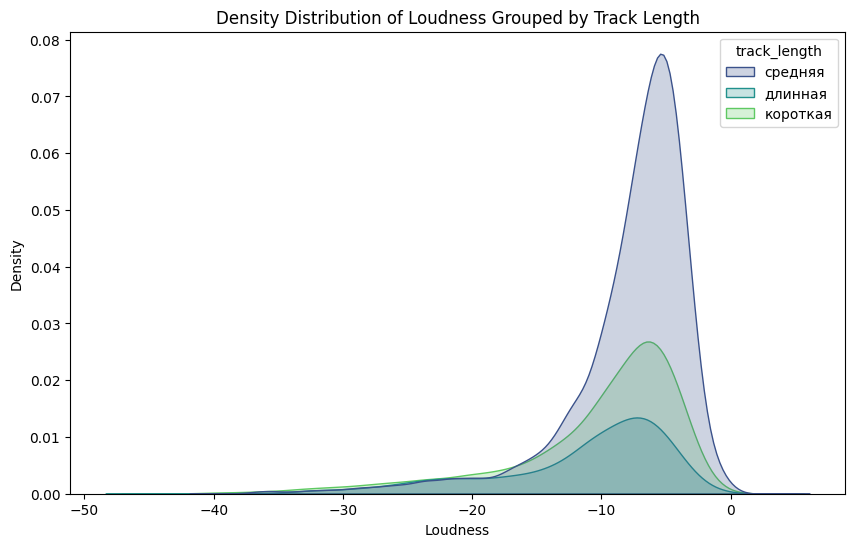

In [136]:

"""Строим график плотности распределения - шаг 8.2"""
plt.figure(figsize=(10, 6))
sns.kdeplot(data=cleaned_dataset, x="loudness", hue="track_length", fill=True, palette="viridis")
plt.xlabel("Loudness")
plt.ylabel("Density")
plt.title("Density Distribution of Loudness Grouped by Track Length")
plt.show()


Text(0.5, 1.0, 'Numerical Ratio of Track Length Categories')

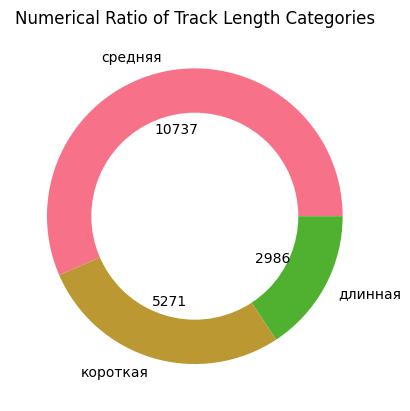

In [138]:
track_len_labels = cleaned_dataset["track_length"].value_counts().reset_index()["index"].tolist()
total = sum(cleaned_dataset["track_length"].value_counts())
colors = sns.color_palette("husl")
plt.pie(cleaned_dataset["track_length"].value_counts(), labels=track_len_labels, autopct=lambda p: "{:.0f}".format(p * total / 100), colors=colors)
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Numerical Ratio of Track Length Categories")

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]